**Structural Inequality in D.C. Civil Service, 1987–2023**

*Rosie/Yutong Meng*

May 1st, 2025 (CU Denver, Spring 2025)

---

**Introduction**

Amid a surge of high-profile layoffs dominating headlines—from tech giants to government contractors—questions about job security, workplace inequality, and institutional mobility are more relevant than ever. In a recent AP News article, a former federal worker reflects on over a decade of public service, only to realize that despite years of dedication, upward mobility within the system remained elusive (Kinnard, 2025). Her story—emerging amid mass layoffs at a tech company—reveals something deeper: that structural stagnation and invisible hierarchies are not exclusive to the private sector. In fact, they are embedded in the design of public employment.

This observation resonates with growing concerns over inequality within government institutions. While public employment is often perceived as stable and meritocratic, closer examination reveals significant disparities—across appointment types, job classifications, and gendered roles. Through a data analysis of the DC public employee salary system, this research analysis how bureaucratic structures reproduce inequality, even in spaces assumed to be neutral and equitable.

The dataset used in this study, “DC Public Employee Salary,” is sourced from the U.S. federal government’s open data platform, Data.gov, and is publicly released and maintained by the Government of the District of Columbia. This dataset contains 118,604 records spanning from July 30, 1966 to April 1, 2025. Each record represents an individual employment entry and includes key variables such as employee name, job title, department (DESCRSHORT), salary (COMPRATE), employment type (GVT_TYPE_OF_APPT), job grade, and hire date. The dataset provides a rare long-term view of the DC public workforce across nearly six decades, enabling both historical and structural analysis. Here is the sample of the dataset below:

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("DC_Public_Employee_Salary.csv")
df['JOBTITLE'] = df['JOBTITLE'].str.title()
df['hire_date'] = pd.to_datetime(df['HIREDATE_STRING'], errors='coerce')
df['hire_year'] = df['hire_date'].dt.year
df['Name'] = df['FIRST_NAME'].str[0] + '. ' + df['LAST_NAME'].str[0] + '.'
cols_to_display = ['Name', 'JOBTITLE', 'DESCRSHORT', 'GRADE', 'COMPRATE', 'hire_date', 'GVT_TYPE_OF_APPT']
sample_df = df[cols_to_display].head(5)
sample_df.style.set_table_attributes('border="1" cellpadding="4" cellspacing="0"')

,Name,JOBTITLE,DESCRSHORT,GRADE,COMPRATE,hire_date,GVT_TYPE_OF_APPT
0,S. P.,Facilities Systems Specialist,DBH,12,90805.000000,1987-10-01 00:00:00,CS - Reg
1,P. O.,Nurse,DBH,05,76510.000000,2000-02-14 00:00:00,CS - Reg
2,D. F.,Special Projects Coordinator,DCG,12,90805.000000,2020-03-16 00:00:00,CS - Term
3,S. K.,Behavioral Health Technician,DBH,08,70600.000000,1988-06-07 00:00:00,CS - Reg
4,O. F.,Behavioral Health Technician,DBH,08,70600.000000,1995-09-18 00:00:00,CS - Reg


**Methodological**

The dataset used in this study was sourced from the official open data platform of the U.S. federal government, Data.gov, and is maintained by the Government of the District of Columbia. Due to the dataset’s nearly six-decade timespan and the occurrence of multiple administrative reforms over the years, there are inconsistencies in data recording formats, job title conventions, and salary calculation methods. For example, job titles in certain years appear entirely in uppercase, and some employment date entries could not be converted into valid date formats. It is important to note that the dataset does not include personal demographic information such as employee gender, race, or educational background, which limits the scope of analysis regarding structural inequality.

To conduct effective analysis, I first performed data preprocessing using Python (with libraries such as Pandas and Matplotlib). This included standardizing job title formats, converting employment date fields, extracting hire year variables, and removing records with missing or zero salary values. Because gender data was not included in the dataset, I referred to existing research on gendered occupational coding to classify positions such as “Teacher” and “Nurse” as female-coded jobs, and “Police Officer” and “Engineer” as male-coded jobs. Based on this, a new variable—“gender coding”—was created to analyze the relationship between gender structure and salary differences. It should be noted, however, that some positions involve multiple responsibilities (e.g., “Program Analyst”), which may not fit neatly into a single category. This introduces potential ambiguity into the classification criteria.

To better visualize salary disparities across different groups, I produced several charts, including a salary trend line by hire year, departmental salary growth curves, bar charts of salary by job title, and boxplots comparing salaries across gender-coded categories. The following sections present the main components of the analysis.

**Findings and Analysis**

To begin understanding structural trends within the D.C. public workforce, we first examine how average annual salaries have changed over time. The chart below illustrates the average salary of public employees by hire year, from 1987 to 2023.

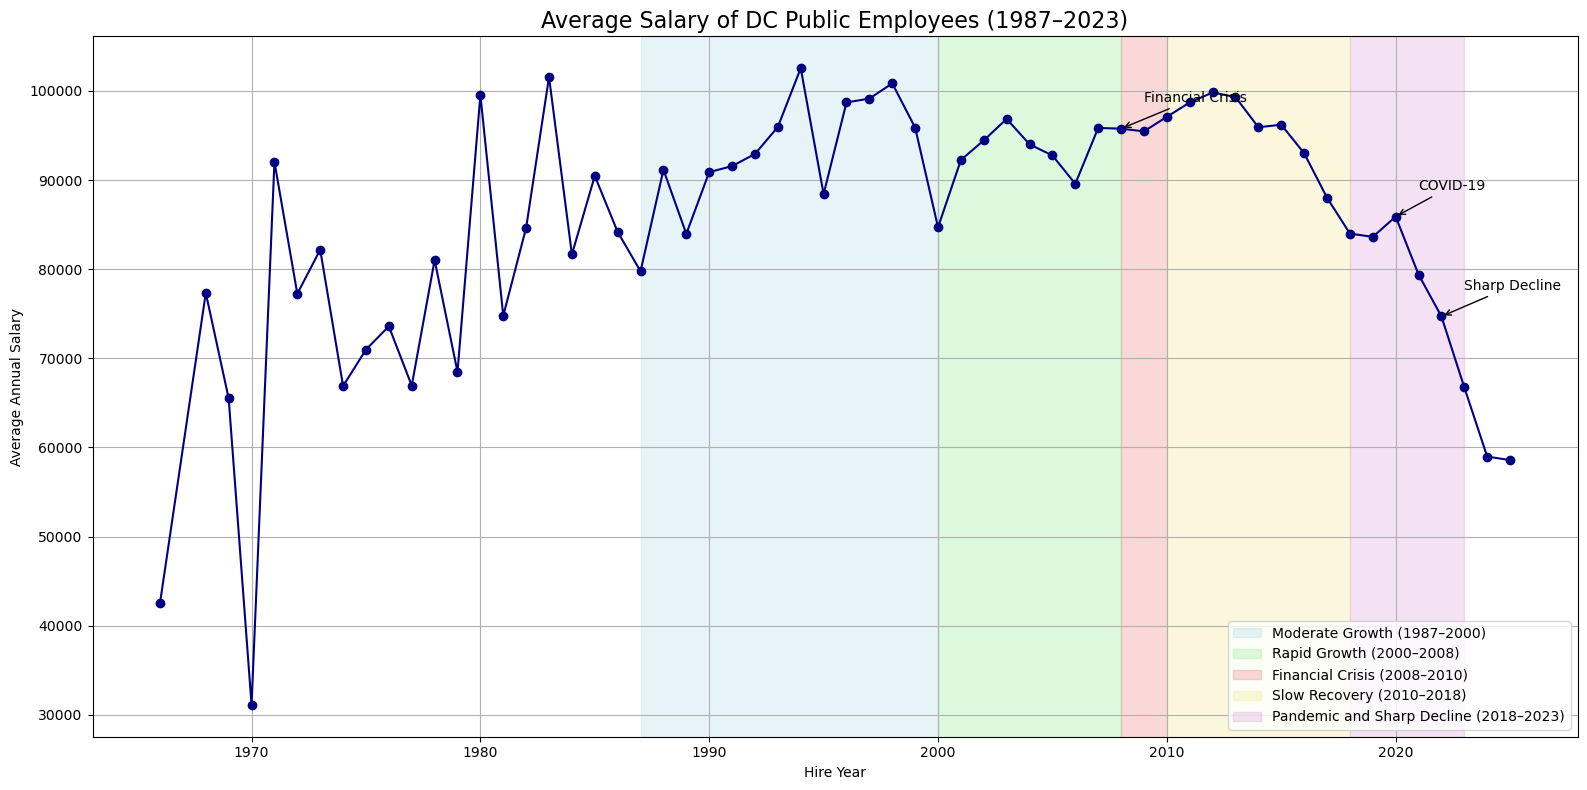

In [12]:
yearly_salary = df.groupby('hire_year')['COMPRATE'].mean().reset_index()
plt.figure(figsize=(16,8))
plt.plot(yearly_salary['hire_year'], yearly_salary['COMPRATE'], marker='o', color='navy')
plt.xlabel('Hire Year')
plt.ylabel('Average Annual Salary')
plt.title('Average Salary of DC Public Employees (1987–2023)', fontsize=16)
plt.grid(True)

plt.axvspan(1987, 2000, color='lightblue', alpha=0.3, label='Moderate Growth (1987–2000)')
plt.axvspan(2000, 2008, color='lightgreen', alpha=0.3, label='Rapid Growth (2000–2008)')
plt.axvspan(2008, 2010, color='lightcoral', alpha=0.3, label='Financial Crisis (2008–2010)')
plt.axvspan(2010, 2018, color='khaki', alpha=0.3, label='Slow Recovery (2010–2018)')
plt.axvspan(2018, 2023, color='plum', alpha=0.3, label='Pandemic and Sharp Decline (2018–2023)')

important_years = {
    2008: 'Financial Crisis',
    2020: 'COVID-19',
    2022: 'Sharp Decline'
}

for year, label in important_years.items():
    if year in yearly_salary['hire_year'].values:
        salary = yearly_salary[yearly_salary['hire_year'] == year]['COMPRATE'].values[0]
        plt.annotate(label,
                     xy=(year, salary),
                     xytext=(year+1, salary+3000),
                     arrowprops=dict(facecolor='black', arrowstyle='->'),
                     fontsize=10,
                     ha='left')

plt.legend(loc='lower right', fontsize=10)
plt.tight_layout()
plt.show()

The first chart visualizes the average salary of D.C. public employees from 1987 to 2023. At a glance, it reveals a general upward trend from the late 1980s through the mid-2000s, followed by stagnation and then a sharp decline in recent years.

While these patterns may initially appear to mirror broader economic cycles, a closer look suggests deeper structural shifts within the civil service system. The early period of growth likely reflects a phase of government expansion and professionalization, whereas the post-2008 flattening may correspond to budget tightening and hiring freezes following the financial crisis. The significant decline beginning in 2018, which accelerates during the COVID-19 pandemic, may be linked not only to fiscal austerity but also to changes in workforce composition—such as an increase in temporary appointments and a loss of higher-paid veteran employees. These possibilities point to systemic transformations in how public labor is valued and structured. In the sections that follow, we will explore these dynamics in greater detail by disaggregating salary trends across job titles, departments, appointment types, and gender-coded roles.

To explore the salary differences among specific positions spercifically, let's take a look at average salaries across the ten most common job titles in the D.C. public workforce. 

/var/folders/yk/cc83vdwn3xg3md1lpw0n1wdc0000gn/T/ipykernel_39267/174771826.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_salary_by_job, x='COMPRATE', y='JOBTITLE', palette='viridis')


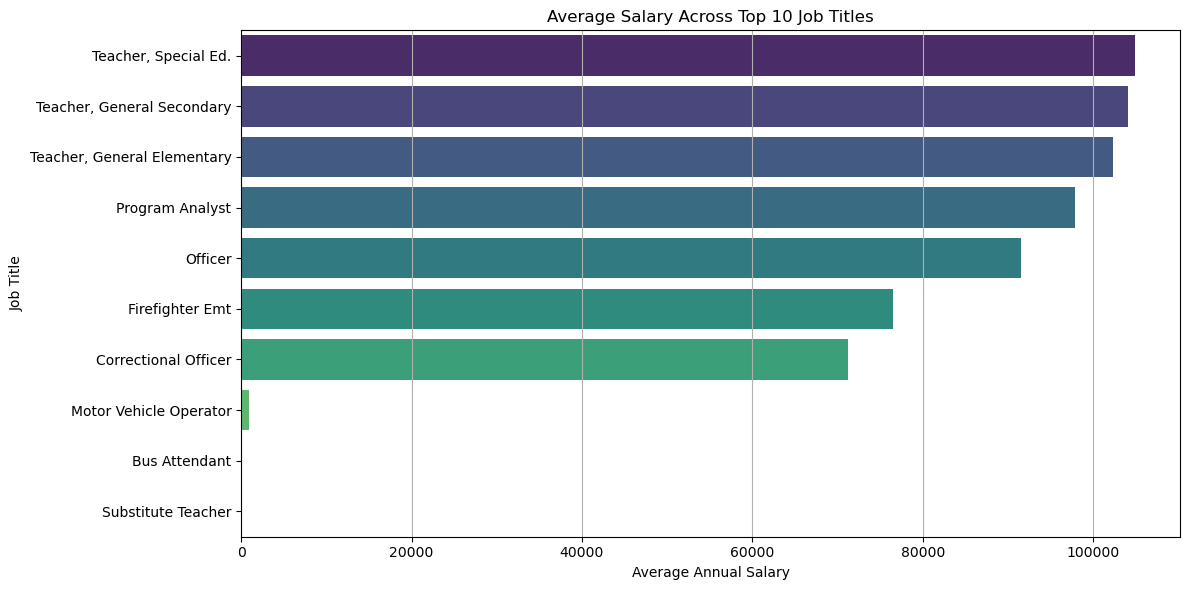

JOBTITLE
Teacher, Special Ed.           104953.061789
Teacher, General Secondary     104093.381703
Teacher, General Elementary    102316.545380
Program Analyst                 97900.519222
Officer                         91484.685345
Firefighter Emt                 76493.019087
Correctional Officer            71271.113039
Motor Vehicle Operator            904.840341
Bus Attendant                      24.793697
Substitute Teacher                 22.449592
Name: COMPRATE, dtype: float64


In [15]:
top_jobs = df['JOBTITLE'].value_counts().head(10).index.tolist()
df_top_jobs = df[df['JOBTITLE'].isin(top_jobs)]

avg_salary_by_job = df_top_jobs.groupby('JOBTITLE')['COMPRATE'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=avg_salary_by_job, x='COMPRATE', y='JOBTITLE', palette='viridis')
plt.xlabel('Average Annual Salary')
plt.ylabel('Job Title')
plt.title('Average Salary Across Top 10 Job Titles')
plt.grid(axis='x')
plt.tight_layout()
plt.show()

avg_salary_by_job = df_top_jobs.groupby('JOBTITLE')['COMPRATE'].mean().sort_values(ascending=False)
print(avg_salary_by_job)

By examining the average salaries of the ten most common job titles in the D.C. public workforce, a clear hierarchy of occupational stratification emerges. Certified professional roles such as Special Education Teacher, Secondary School Teacher, and Program Analyst all have average annual salaries exceeding $97,000. These positions typically come with stringent entry requirements—such as teaching certifications, civil service examinations, or advanced degrees and technical expertise required for analytical roles. These qualifications increase the perceived "scarcity" of such jobs and make it easier for workers to access higher job classifications and salary grades (such as higher GRADE levels), thereby automatically securing greater opportunities for advancement and income protection within the system.

In stark contrast, positions like Bus Attendant and Substitute Teacher have average annual salaries of only $20,000 to $30,000. These roles are generally considered “supportive” or “service-based” labor, such as managing student transportation or covering temporary classroom absences. They tend to have low entry barriers and often lack stable employment status or long-term contract protections, making it difficult for workers in these roles to access standard promotion pathways or performance-based raises. Moreover, although these jobs are essential to the daily functioning of public institutions, they have long been associated with "feminized care labor" and are systematically devalued within institutional pay structures—leading to a persistent disconnect between the actual value of the work and the compensation it receives.

After identifying the highest- and lowest-paid positions, the next step in this analysis focuses on the relationship between gender structure and wage inequality. Although the dataset does not explicitly include employee gender, we can apply a method of “gender-coding” job titles to examine which positions are more traditionally associated with women or men in societal norms, and compare the salary distributions across these categories.

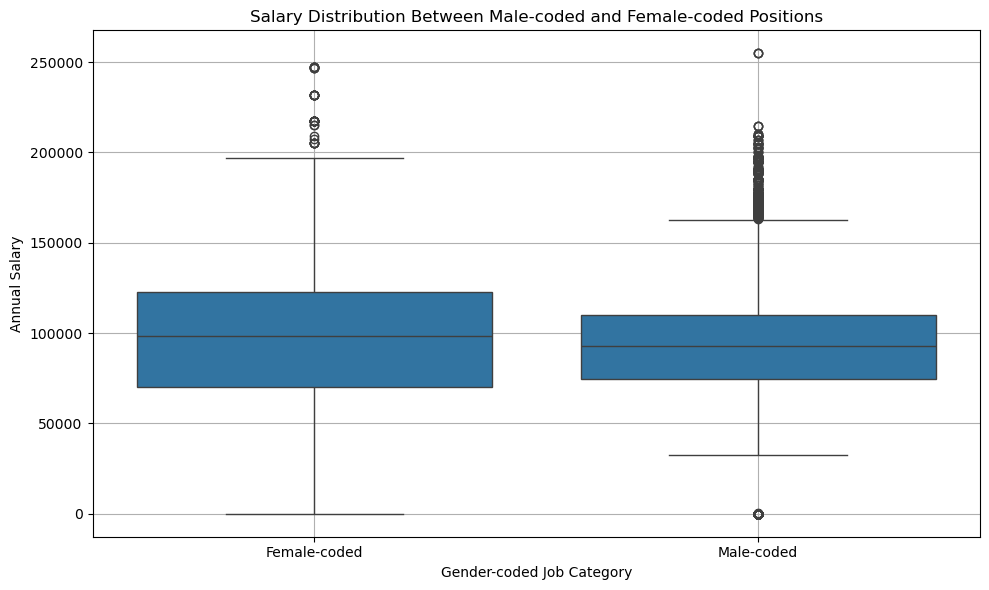

gender_coding
Female-coded    91091.348582
Male-coded      95819.161738
Name: COMPRATE, dtype: float64


In [18]:
female_coded_jobs = ['Nurse', 'Teacher', 'Clerk', 'Assistant', 'Secretary', 'Social Worker']
male_coded_jobs = ['Police Officer', 'Firefighter', 'Engineer', 'Inspector', 'Supervisor', 'Investigator']
def classify_job(job):
    if any(female_job in job for female_job in female_coded_jobs):
        return 'Female-coded'
    elif any(male_job in job for male_job in male_coded_jobs):
        return 'Male-coded'
    else:
        return 'Other'

df['gender_coding'] = df['JOBTITLE'].apply(classify_job)
df_gender_jobs = df[df['gender_coding'].isin(['Female-coded', 'Male-coded'])]

plt.figure(figsize=(10,6))
sns.boxplot(data=df_gender_jobs, x='gender_coding', y='COMPRATE')
plt.xlabel('Gender-coded Job Category')
plt.ylabel('Annual Salary')
plt.title('Salary Distribution Between Male-coded and Female-coded Positions')
plt.grid(True)
plt.tight_layout()
plt.show()

avg_salary_by_gender_code = df_gender_jobs.groupby('gender_coding')['COMPRATE'].mean()
print(avg_salary_by_gender_code)

Although traditional “male-coded” occupations are commonly associated with higher pay due to prevailing social stereotypes, this chart presents an apparently counterintuitive yet structurally consistent pattern: the median salary for female-coded positions is slightly higher than that of male-coded ones. However, this discrepancy should not be interpreted as an institutional advantage for “female” jobs. Rather, it likely reflects the high degree of standardization and bureaucratic protection granted to certain female-dominated roles in the public sector—such as certified teaching positions.

The salary distribution for female-coded jobs is more concentrated, with a relatively high median but a constrained upper bound, lacking extreme high-salary outliers. In contrast, male-coded jobs show much greater variability: their median salary is slightly lower, but a subset of high-paying positions significantly elevates the average, suggesting a sharper internal hierarchy. This indicates that while male-coded categories include many lower-wage jobs, they also encompass roles with greater promotion potential and negotiation leverage.

On a deeper level, this pattern may reflect a dual-track structure within the public employment system: on one track, professional female-coded jobs benefit from standardized protections that ensure stable compensation; on the other, male-coded jobs are more likely to fall into broader, more variable salary schemes—shaped by job grade, appointment type, and departmental power—leading to salary extremes without raising the overall median.

To further understand the structural inequalities in salary growth within the D.C. public workforce, we shift our focus from job titles and gender to the evolving dynamics across different government departments. While job titles and gender coding reveal horizontal disparities in pay scales, the departmental dimension offers a lens to observe vertical shifts over time—particularly useful for identifying which departments have received preferential resource allocation or institutional advantages over the past decades.
The following chart illustrates the salary trends of the top five departments with the fastest average salary growth (Top 5 Fastest Growing Departments by Salary Over Time).

/var/folders/yk/cc83vdwn3xg3md1lpw0n1wdc0000gn/T/ipykernel_39267/1320683938.py:5: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  growth_rate = pivot_table.pct_change().mean().sort_values(ascending=False)


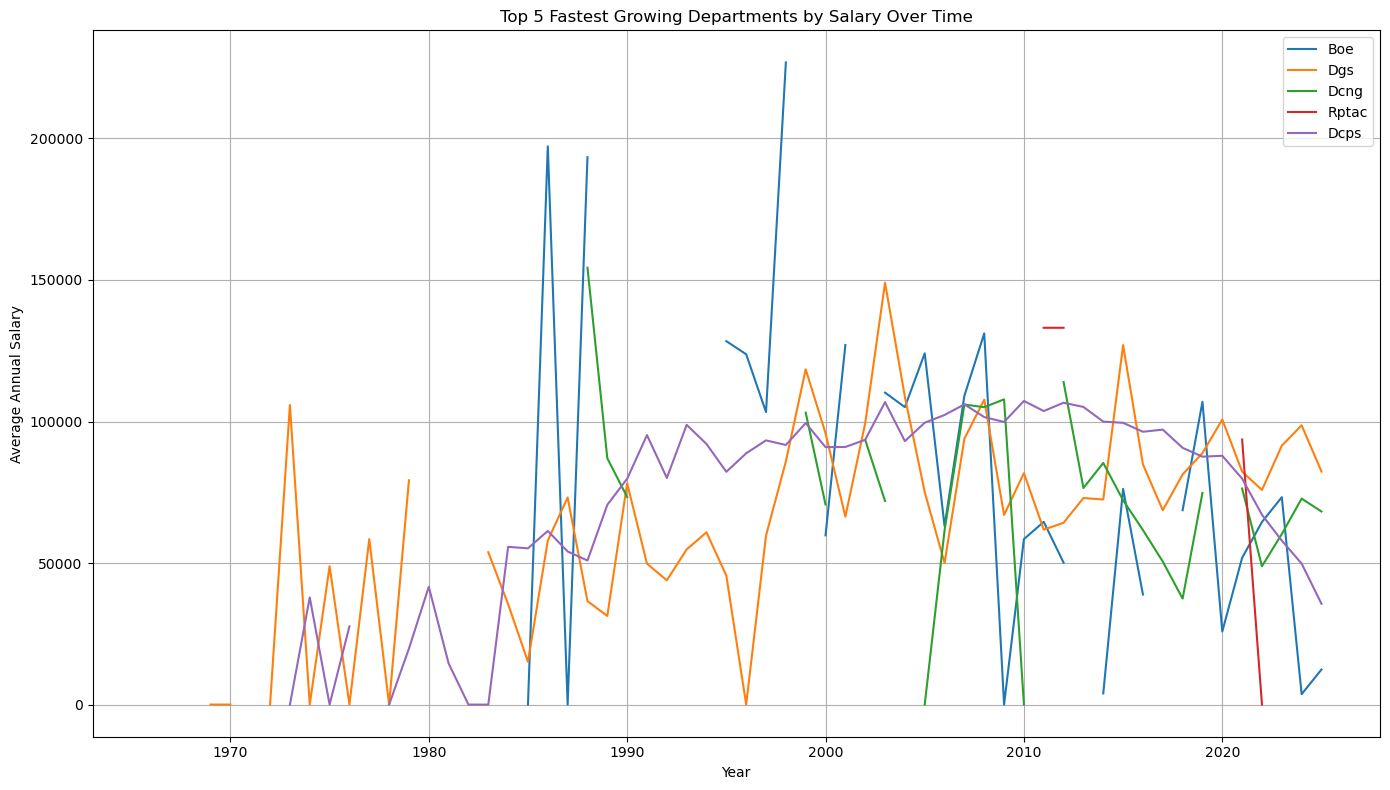

In [17]:
df['DESCRSHORT'] = df['DESCRSHORT'].str.title()
df = df[(df['hire_year'].notnull()) & (df['COMPRATE'].notnull()) & (df['COMPRATE'] > 0)]
dept_year_salary = df.groupby(['hire_year', 'DESCRSHORT'])['COMPRATE'].mean().reset_index()
pivot_table = dept_year_salary.pivot(index='hire_year', columns='DESCRSHORT', values='COMPRATE')
growth_rate = pivot_table.pct_change().mean().sort_values(ascending=False)
top_5_departments = growth_rate.head(5).index.tolist()
plt.figure(figsize=(14,8))
for dept in top_5_departments:
    plt.plot(pivot_table.index, pivot_table[dept], label=dept)

plt.xlabel('Year')
plt.ylabel('Average Annual Salary')
plt.title('Top 5 Fastest Growing Departments by Salary Over Time')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Although the surface of the chart reflects differences in salary growth across departments, the deeper question is: why have these five departments been able to sustain salary increases, while others have experienced stagnation or even severe fluctuations?

From the chart, it is evident that departments with the greatest salary growth—such as BOE (Board of Elections) and RPTAC (Real Property Tax Appeals Commission)—are closely tied to government functions related to fiscal revenue, policy enforcement, or political processes. These departments possess higher “visibility” and greater “bargaining power” within the institutional structure, making their positions more likely to receive fiscal support, institutional protections, and promotions in salary grades.
In contrast, departments that did not rank among the top five—despite often handling the essential day-to-day operations of the city (such as transportation, sanitation, and logistics)—lack sustained salary support.

This phenomenon reveals that salary growth is not solely determined by market forces or individual performance, but is deeply shaped by institutional judgments about the value of different types of labor.

When public resources are allocated across departments, those whose functions are perceived as “high-risk,” “high-technical,” or “high-political-value” are more likely to receive active investment and protection, whereas roles categorized as “basic” or “easily replaceable” face a greater risk of being marginalized.
This structural tilt not only affects employees' salary levels but also exacerbates long-term resource inequality within the public employment system.

However, institutionalized inequality is not only evident at the departmental level—it is also deeply embedded in the forms of employment themselves. The following chart, which illustrates the salary distribution between “CS – Reg” (regular employees) and “CS – Term” (temporary employees), reveals the deeper structural divide of “equal work, unequal rights.”

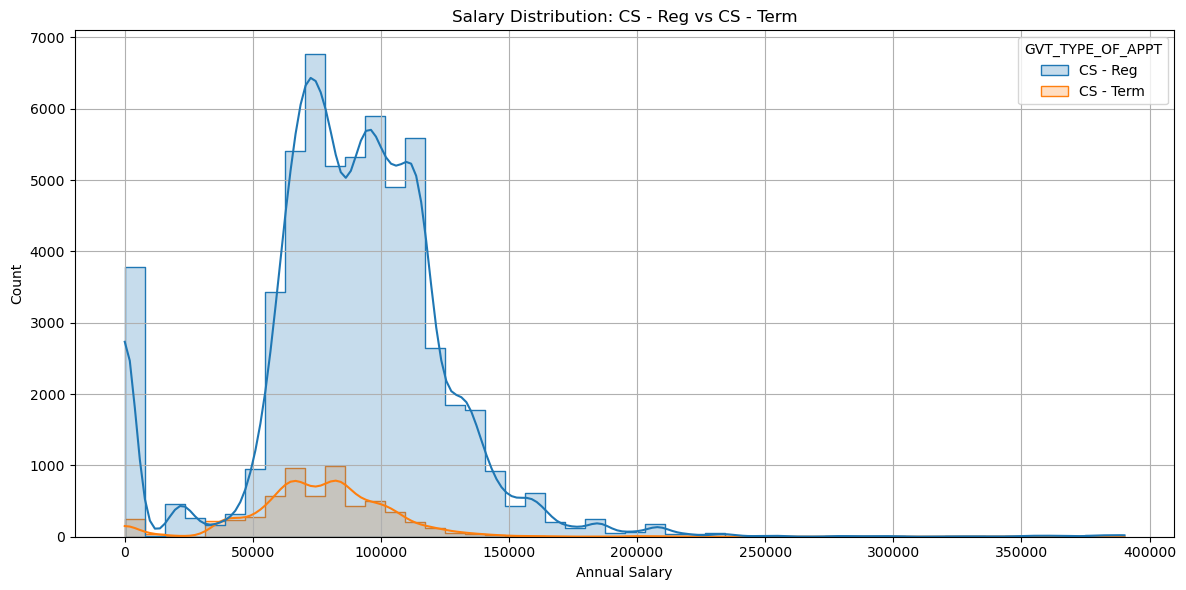

GVT_TYPE_OF_APPT
CS - Reg     88533.964605
CS - Term    75468.564334
Name: COMPRATE, dtype: float64
t-statistic: 30.701, p-value: 0.0000


In [63]:
df = pd.read_csv("DC_Public_Employee_Salary.csv")
df_filtered = df[
    (df['COMPRATE'].notnull()) & (df['COMPRATE'] > 0) &
    (df['GVT_TYPE_OF_APPT'].isin(['CS - Reg', 'CS - Term']))
]
plt.figure(figsize=(12, 6))
sns.histplot(
    data=df_filtered,
    x='COMPRATE',
    hue='GVT_TYPE_OF_APPT',
    bins=50,
    kde=True,
    element='step'
)
plt.xlabel('Annual Salary')
plt.title('Salary Distribution: CS - Reg vs CS - Term')
plt.grid(True)
plt.tight_layout()
plt.show()
avg_salary_by_type = df_filtered.groupby('GVT_TYPE_OF_APPT')['COMPRATE'].mean()
print(avg_salary_by_type)

reg_salaries = df_filtered[df_filtered['GVT_TYPE_OF_APPT'] == 'CS - Reg']['COMPRATE']
term_salaries = df_filtered[df_filtered['GVT_TYPE_OF_APPT'] == 'CS - Term']['COMPRATE']

t_stat, p_value = ttest_ind(reg_salaries, term_salaries, equal_var=False)
print(f"t-statistic: {t_stat:.3f}, p-value: {p_value:.4f}")

Although both “CS - Reg” (regular employees) and “CS - Term” (temporary employees) are part of the D.C. government workforce, the chart clearly reveals a significant disparity in their salary distributions. CS - Reg positions exhibit a wider salary spread, a higher peak, and a notably higher average salary compared to CS - Term positions. Employment type not only defines the terms of the labor contract, but also shapes access to promotion pathways, salary grades, and institutional benefits. CS - Reg employees typically enjoy long-term tenure, pension plans, and performance-based advancement, whereas CS - Term positions are often used for temporary coverage or project-based contracts, lacking sustained investment in compensation.

The government maintains this institutionalized dual-track system ostensibly for fiscal flexibility—allowing vacancies to be filled at lower cost. However, it also creates a built-in hierarchy: who gets to be employed long-term and who remains in a temporary, replaceable role. This mechanism means that many term employees, even after working within the system for years, are never granted equal opportunities for advancement—as if they’re permanently stuck on the “bench.” For individuals, this directly impacts their ability to achieve long-term economic security and career progression; for the system, it silently reinforces structural inequality from within.

**Behind the Data**

Data Feminism points out: “what’s missing is as important as what’s present.” One notable omission in this dataset is the absence of racial information for employees—a gap that significantly limits our ability to fully understand structural inequality. Such absences in data are rarely neutral; rather, they often reflect institutional choices. In this case, the decision not to record race may function as a form of depoliticization—rendering racialized inequalities invisible at the data level and, by extension, absent from policy discourse. As D’Ignazio and Klein argue, “Power is not evenly distributed.” Those with greater institutional visibility and voice are more likely to be represented in official records, while marginalized groups may lack even the right to be seen.

Therefore, when analyzing structural inequality within the public employment system, we must recognize that what we can observe—salary, employment type, job title—are merely the “cooked data” that institutions have chosen to preserve. The missing “raw data”—such as race, language, or identity—may in fact hold the key to uncovering deeper patterns of injustice. The responsibility of researchers is not only to interpret what data reveals, but also to interrogate what it leaves unsaid.

**Conclusion**

Structural inequality is not the result of individual choices, but of institutional design and regimes of visibility (Hurrell, 2005). The disparity between regular and temporary employees’ salaries, along with the significantly faster salary growth observed in certain government departments, points to the existence of a “hidden hierarchy” within the public sector. This phenomenon is not merely the outcome of individual effort, but rather a reflection of how institutional resources are allocated and how roles are structurally positioned. While the data suggests that female-coded occupations have a slightly higher median salary than male-coded ones, this does not imply that women hold a systemic advantage within the civil service. More likely, it reflects the standardized protections attached to specific roles, rather than genuine gender equity.

At the same time, what appears to be “neutral” data often embodies institutional choices. The absence of variables such as race not only limits the depth of our analysis but also contributes to the systematic erasure of certain forms of inequality at the data level. This makes the experiences of some people "invisible" and also quietly conceals certain inequalities.

This study is not without its limitations. The classification of gender-coded occupations may lack full precision, and questions may arise regarding the continuity and completeness of the dataset itself. Nonetheless, long-term public salary records of this nature remain rare within the realm of open government data. This dataset offers a valuable entry point for understanding how inequality is both constructed and sustained within the architecture of the civil service.

**References**

D’Ignazio, C., & Klein, L. (2020). 4. “What Gets Counted Counts.” In Data Feminism. https://data-feminism.mitpress.mit.edu/pub/h1w0nbqp

D’Ignazio, C., & Klein, L. (2020). 6. The Numbers Don’t Speak for Themselves. In Data Feminism. Retrieved from https://data-feminism.mitpress.mit.edu/pub/czq9dfs5

Hurrell, A. (2005). Power, institutions, and the production of inequality. Power in global governance, 56.

Kinnard, M. (2025, February 19). Fired federal workers hunt for new jobs but struggle to replace their ... Associated Press. https://apnews.com/article/doge-firings-layoffs-federal-government-workers-musk-57671a76f22d5398a3c794e29e350082